# Library

In [1]:
# Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
import pickle

# **DATASET B (ObesityDataSet2)**

---

- Gender = Laki-laki atau Wanita 

- Age = Usia seseorang dalam tahun 
- Height = Tinggi dalam meter 
- Weight = Berat dalam kilogram 
- family_history_with_overweight = Apakah orang tersebut memiliki riwayat keluarga dengan kelebihan berat badan 
- FAVC = Jika orang tersebut sering mengonsumsi makanan berkalori tinggi (ya/tidak) 
- FCVC = Frekuensi konsumsi sayuran (skala dari 1 hingga 3) 
- NCP = Jumlah makanan utama per hari 
- CAEC = Frekuensi mengonsumsi makanan di antara waktu makan (Tidak pernah,  Kadang-kadang, Sering, Selalu)  
- SMOKE = Apakah orang tersebut merokok (ya/tidak) 
- CH2O = Asupan air harian (skala dari 1 hingga 3) 
- SCC = Jika orang tersebut memantau asupan kalori mereka (ya/tidak) 
- FAF = Frekuensi aktivitas fisik (skala dari 0 hingga 3) 
- TUE =  Waktu yang dihabiskan untuk menggunakan teknologi (skala dari 0 hingga 3) 
- CALC = Frekuensi konsumsi alkohol (Tidak pernah, Kadang-kadang, Sering, Selalu) 
- MTRANS = Moda transportasi utama (Mobil, Sepeda, Sepeda Motor, Transportasi Umum, Jalan Kaki) 
- NObeyesedad (target_variable) = Tingkat obesitas (Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II, Obesity Type III)

In [2]:
# Load the dataset
df = pd.read_csv('ObesityDataSet2.csv')
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,24,1.58,65.29,yes,no,2.03,2.74,Sometimes,no,2.00,no,1.28,1.019,no,Public_Transportation,Overweight_Level_II
1,Male,23,1.65,66.00,no,no,3.00,3.00,Sometimes,no,2.00,no,3.00,0.000,no,Public_Transportation,Normal_Weight
2,Female,21,1.69,51.26,yes,yes,3.00,3.18,Frequently,no,1.91,no,0.48,0.625,no,Public_Transportation,Insufficient_Weight
3,Female,22,1.69,65.00,yes,yes,2.00,3.00,Sometimes,no,2.00,no,1.00,1.000,Sometimes,Public_Transportation,Normal_Weight
4,Female,23,1.61,82.64,yes,yes,2.96,1.00,Sometimes,no,2.98,no,0.74,2.000,Sometimes,Public_Transportation,Obesity_Type_I


# EDA

In [3]:
# Check for data types, null values, and basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056 entries, 0 to 1055
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          1056 non-null   object 
 1   Age                             1056 non-null   object 
 2   Height                          1056 non-null   float64
 3   Weight                          1056 non-null   float64
 4   family_history_with_overweight  1056 non-null   object 
 5   FAVC                            1056 non-null   object 
 6   FCVC                            1019 non-null   float64
 7   NCP                             1056 non-null   float64
 8   CAEC                            1056 non-null   object 
 9   SMOKE                           1056 non-null   object 
 10  CH2O                            1056 non-null   float64
 11  SCC                             1056 non-null   object 
 12  FAF                             10

- Dataset berisi 1056 data pemesanan hotel dengan 17 kolom.

- Terdapat data yang hilang di 2 kolom: FCVC(Frekuensi konsumsi sayuran), MTRANS(transportasi utama).

- Semua tipe data sudah sesuai dengan isi kolomnya


## Check Missing Value

In [4]:
#check missing value
df.isnull().sum()


Gender                             0
Age                                0
Height                             0
Weight                             0
family_history_with_overweight     0
FAVC                               0
FCVC                              37
NCP                                0
CAEC                               0
SMOKE                              0
CH2O                               0
SCC                                0
FAF                                0
TUE                                0
CALC                               0
MTRANS                            26
NObeyesdad                         0
dtype: int64

Terdapat missing value di 2 kolom:

- FCVC sebanyak 37 data hilang

- MTRANS sebanyak 26 data hilang

In [5]:
df.duplicated().sum()

10

ada 10 baris duplikat di dataset 

## Target Variable Distribution

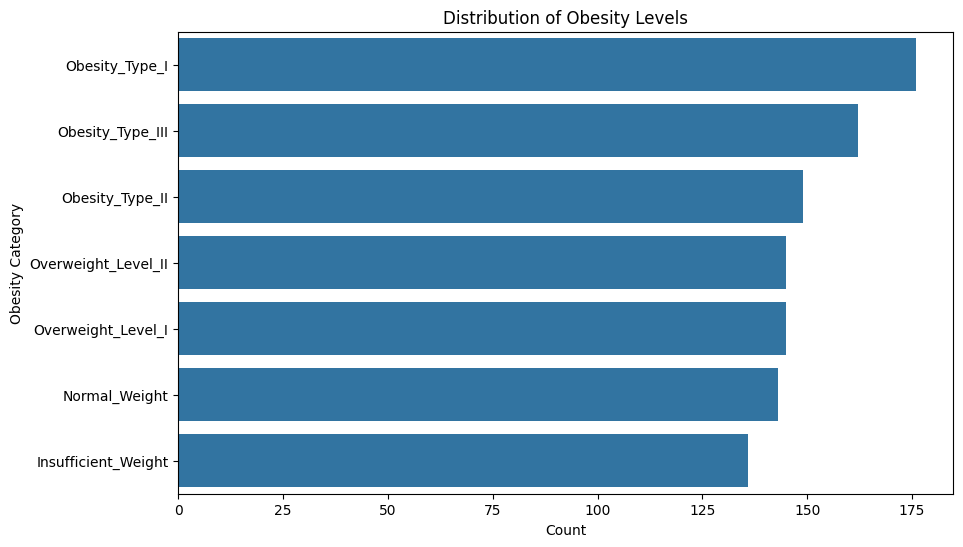

In [6]:
# Check target variable distribution
plt.figure(figsize=(10, 6))
sns.countplot(y='NObeyesdad', data=df, order=df['NObeyesdad'].value_counts().index)
plt.title('Distribution of Obesity Levels')
plt.xlabel('Count')
plt.ylabel('Obesity Category')
plt.show()


- Obesity_Type_I adalah kategori dengan jumlah individu terbanyak, Disusul oleh Obesity_Type_III dan Obesity_Type_II, yang berarti proporsi individu dengan obesitas cukup tinggi secara keseluruhan.

- Insufficient_Weight adalah kategori dengan jumlah individu paling sedikit.

In [7]:
df['NObeyesdad'].value_counts()

NObeyesdad
Obesity_Type_I         176
Obesity_Type_III       162
Obesity_Type_II        149
Overweight_Level_II    145
Overweight_Level_I     145
Normal_Weight          143
Insufficient_Weight    136
Name: count, dtype: int64

## Numerical Column Distribution

In [8]:
# Explore numerical features
num_cols = df.select_dtypes(include=['float64']).columns
print("Numerical columns:", num_cols)

Numerical columns: Index(['Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'], dtype='object')


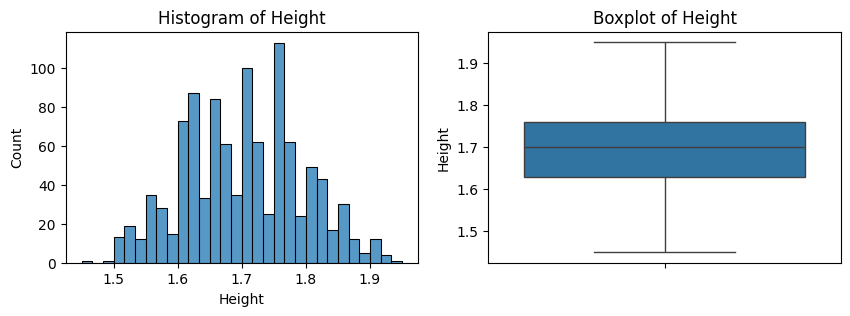

Height- skewness: 0.04857188563996988
Height- kurtosis: -0.5402007615927711


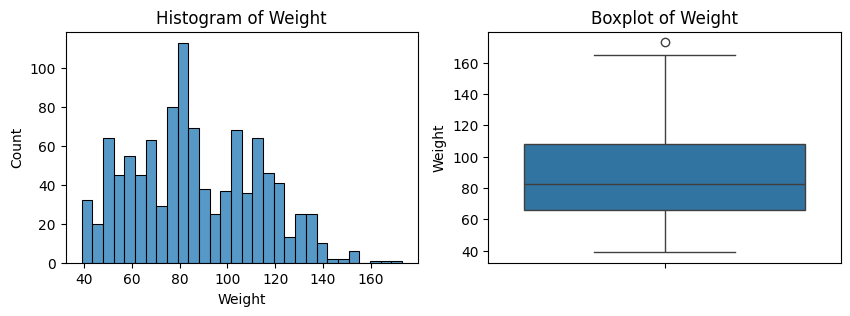

Weight- skewness: 0.2739196363894411
Weight- kurtosis: -0.6636128801713563


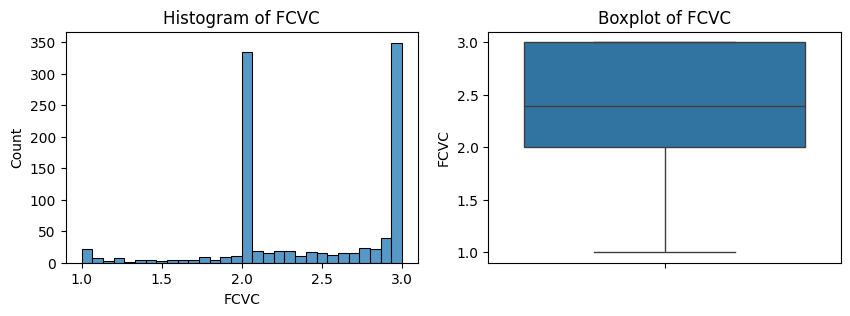

FCVC- skewness: -0.43712825738978545
FCVC- kurtosis: -0.6489860673221473


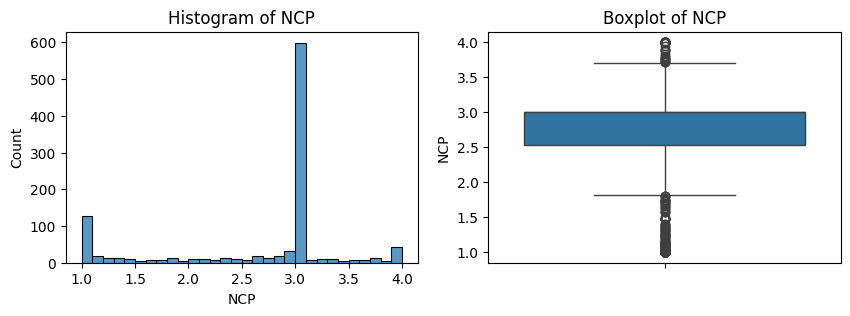

NCP- skewness: -1.0286742643503233
NCP- kurtosis: 0.06689771329620431


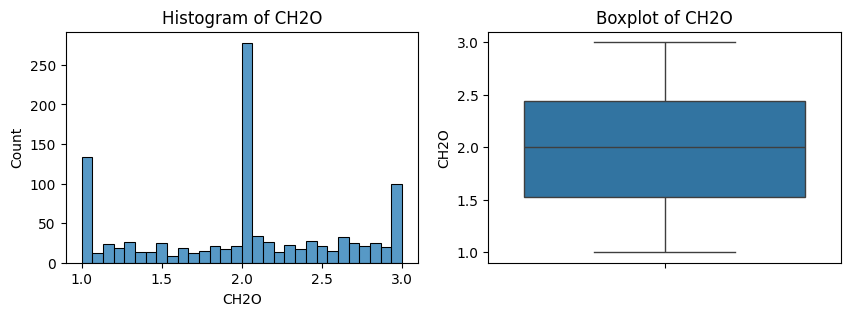

CH2O- skewness: -0.08385594970030814
CH2O- kurtosis: -0.8827755767862664


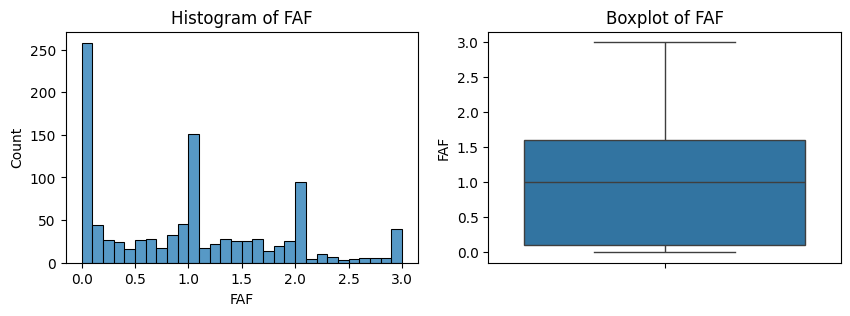

FAF- skewness: 0.5505625056489023
FAF- kurtosis: -0.5520801267647082


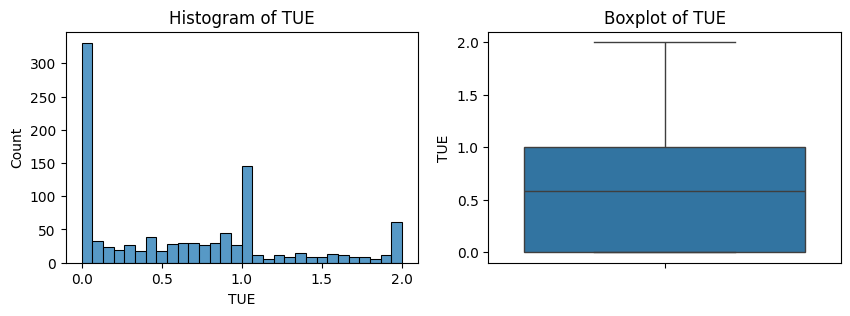

TUE- skewness: 0.6602281229353165
TUE- kurtosis: -0.534071410214167


In [9]:
def dist_plot(df, num_cols):
  for i in num_cols:
    plt.figure(figsize=(10,3))

    plt.subplot(1,2,1)
    sns.histplot(df[i], bins=30)
    plt.title(f"Histogram of {i}")

    plt.subplot(1,2,2)
    sns.boxplot(df[i])
    plt.title(f"Boxplot of {i}")

    plt.show()

    print(f"{i}- skewness: {df[i].skew()}")
    print(f"{i}- kurtosis: {df[i].kurt()}")

dist_plot(df,num_cols)

Dapat disimpulkan bahwa :

- Karakteristik Fisik Mengindikasikan Risiko: Sampel memiliki distribusi tinggi badan yang normal, namun distribusi berat badannya cenderung ke arah yang lebih berat, yang sejalan dengan fokus studi pada obesitas.

- Pola Makan Terstruktur Namun Bervariasi Kualitasnya: Pola makan utama sangat terstruktur (mayoritas 3 kali sehari). Namun, kualitasnya bervariasi; kebiasaan konsumsi sayuran dan air membagi populasi menjadi kelompok-kelompok dengan kebiasaan yang berbeda (seperti, yang rajin vs. yang sedang-sedang saja).

- Gaya Hidup Sedentari Adalah Masalah Utama: Temuan yang paling menonjol adalah tingginya jumlah individu yang tidak aktif secara fisik (FAF = 0). Ini, kemungkinan besar, adalah kontributor utama terhadap masalah berat badan berlebih dan obesitas dalam populasi ini.

## Categorical Column Distribution

In [10]:
# Explore categorical features
cat_cols = df.select_dtypes(include=['object']).columns
print("Categorical columns:", cat_cols)

Categorical columns: Index(['Gender', 'Age', 'family_history_with_overweight', 'FAVC', 'CAEC',
       'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')


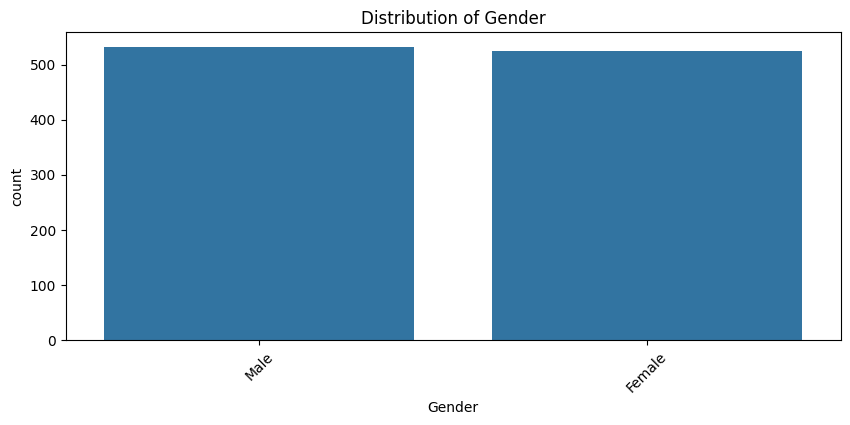

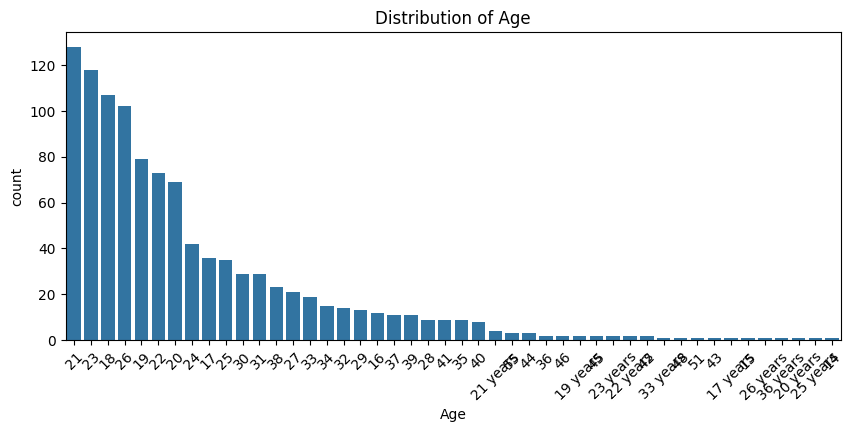

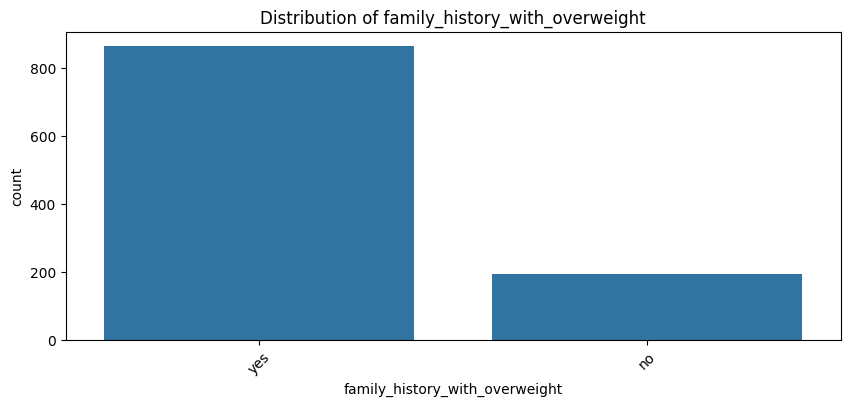

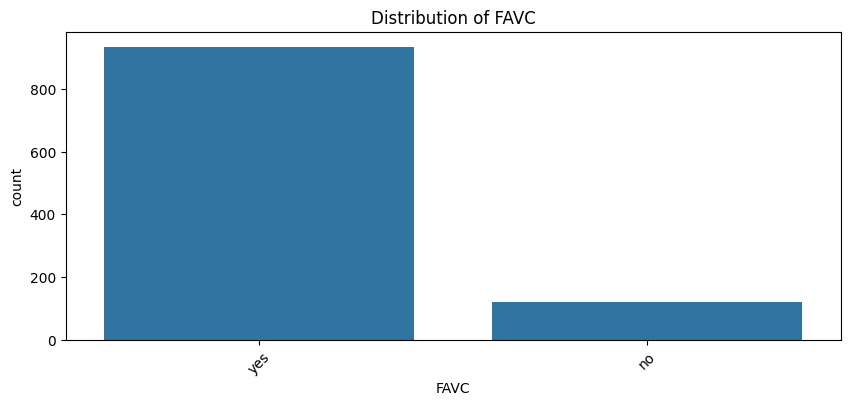

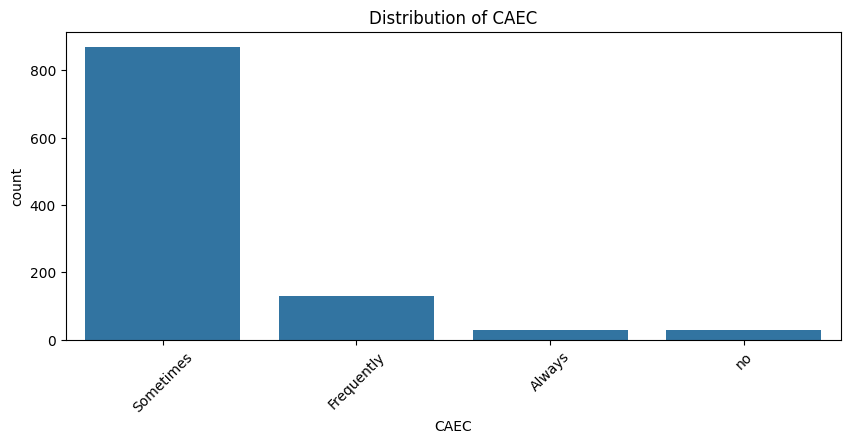

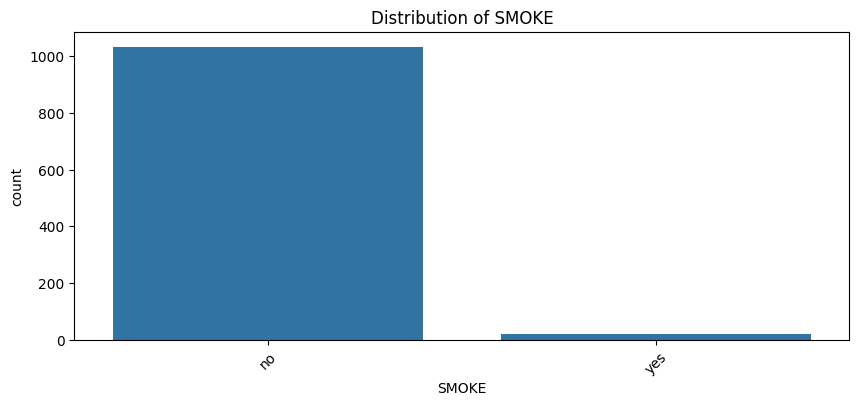

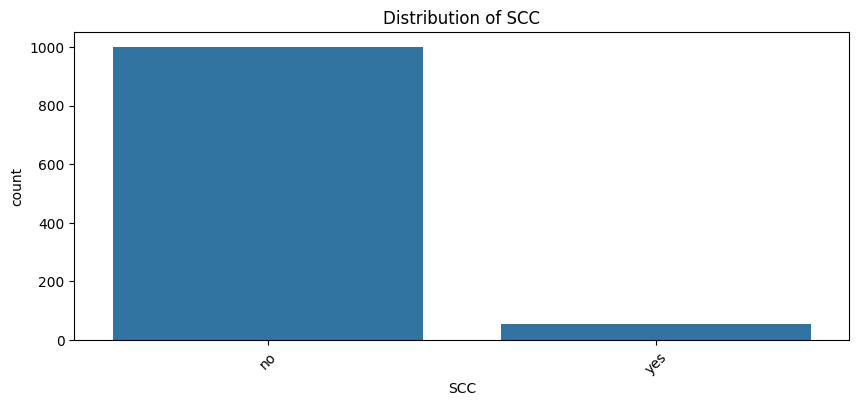

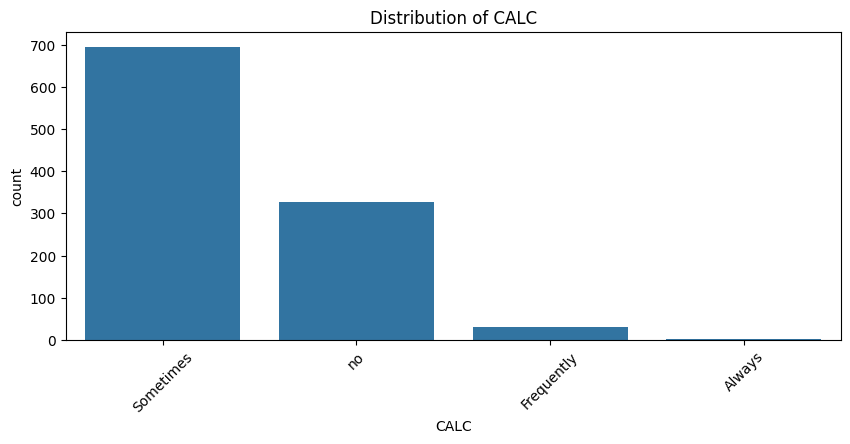

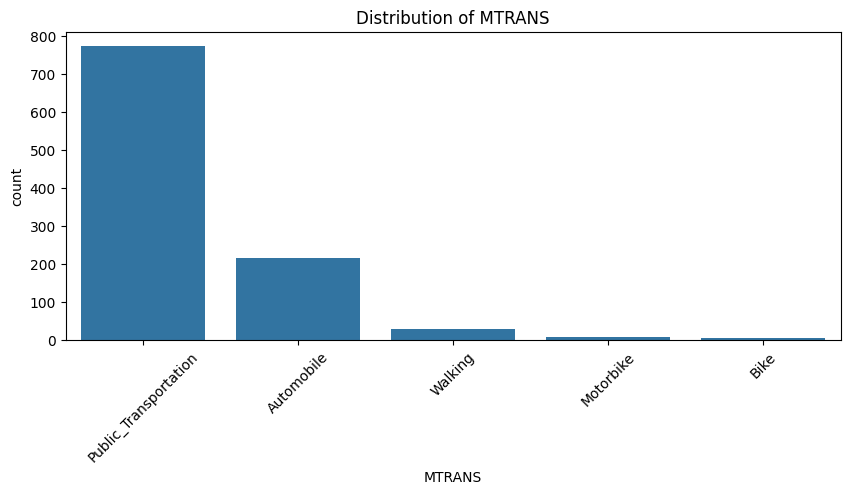

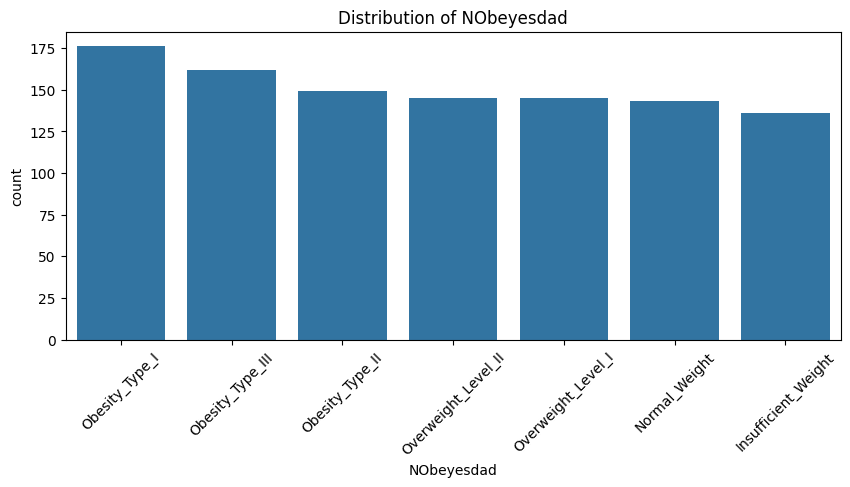

In [11]:
for col in cat_cols:
    if col != 'Booking_ID':
        plt.figure(figsize=(10,4))
        sns.countplot(x=col, data=df, order=df[col].value_counts().index)
        plt.xticks(rotation=45)
        plt.title(f'Distribution of {col}')
        plt.show()

Secara keseluruhan, plot diatas menggambarkan sekelompok dewasa muda yang berada dalam fase mendapatkan risiko obesitas: mereka memiliki kerentanan genetik, terlibat dalam perilaku diet berisiko tinggi, dan menjalani gaya hidup yang tidak aktif. Fakta bahwa variabel target NObeyesdad terdistribusi secara seimbang meskipun ada faktor-faktor risiko yang begitu dominan menjadikan dataset ini sangat berharga untuk meneliti pola dan interaksi kompleks yang menentukan apakah seseorang akan memiliki berat badan kurang, normal, atau mengembangkan berbagai tingkat obesitas.

# Preprocessing

In [12]:
# Feature Engineering
# Handle 'Age' column with 'years' suffix
df['Age'] = df['Age'].astype(str).str.replace(' years', '').str.replace('year', '').astype(float)

In [13]:
# Separate features and target
X = df.drop('NObeyesdad', axis=1)
y = df['NObeyesdad']

In [14]:
# Encode target labels as integers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [15]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)


In [16]:
# Define numerical and categorical features
numeric_features = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
categorical_features = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']

# Create preprocessing pipelines
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

Numerical:
- SimpleImputer(strategy='median'): Mengisi data yang hilang (missing values) dengan nilai median dari masing-masing kolom numerik.
- StandardScaler(): Melakukan standardisasi: mengubah distribusi data agar memiliki mean = 0 dan standar deviasi = 1. Ini penting supaya setiap fitur numerik berada pada skala yang sama.

Categorical:
- SimpleImputer(strategy='most_frequent'): Mengisi nilai yang hilang pada data kategorikal dengan nilai yang paling sering muncul (modus) di kolom tersebut.
- OneHotEncoder(handle_unknown='ignore'): Mengubah nilai kategorikal menjadi bentuk one-hot (vektor biner). Jika ada nilai kategori baru saat inferensi (prediksi), encoder ini mengabaikannya daripada error.


In [17]:
# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

Menyatukan dua preprocessing pipeline (numerik dan kategorikal) ke dalam satu objek preprocessor menggunakan ColumnTransformer

In [18]:
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Age', 'Height', 'Weight', 'FCVC', 'NCP',
                                  'CH2O', 'FAF', 'TUE']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Gender', 'family_history_with_overweight',
                                  'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC',
                                  'MTRANS'])])

# Modeling

In [19]:
# Model Building
# Define two different classifiers
rf_classifier = RandomForestClassifier(random_state=42)
xgb_classifier = XGBClassifier(random_state=42, eval_metric='mlogloss', use_label_encoder=False) 

# Create pipelines for each classifier
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                             ('classifier', rf_classifier)])

xgb_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', xgb_classifier)])

Membangun dua buah pipeline model machine learning, masing-masing menggunakan:
- Random Forest Classifier
- XGBoost Classifier

Keduanya dibungkus dalam pipeline yang sudah mencakup preprocessing data yang udah kita buat sebelumnya.

Kita pilih 2 model ini untuk dibandingkan karena:

- Random Forest = karena stabil dan tidak mudah overfitting, cocok untuk data campuran (numerik & kategorikal), serta memberikan hasil yang baik tanpa banyak tuning.

- XGBoost = karena akurasinya tinggi dan sangat efektif dalam menangani data kompleks, dengan fitur regularisasi untuk mengurangi overfitting.



In [20]:
rf_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Height', 'Weight',
                                                   'FCVC', 'NCP', 'CH2O', 'FAF',
                                                   'TUE']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender',
                                                   'family_history_with_overweight',
                                                   'FAVC', 'CAEC', 'SMOKE',
                                                   'SCC', 'CALC',
                                                   'MTRANS'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [21]:
xgb_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Height', 'Weight',
                                                   'FCVC', 'NCP', 'CH2O', 'FAF',
                                                   'TUE']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=42, ...))])

# Fine Tuning

In [22]:
# Hyperparameter tuning for Random Forest
rf_param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5],
    'classifier__min_samples_leaf': [1, 2]
}

rf_grid_search = GridSearchCV(rf_pipeline, rf_param_grid, cv=3, n_jobs=-1, verbose=1)  # Reduced cv for faster computation
rf_grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Age',
                                                                          'Height',
                                                                          'Weight',
                                                                          'FCVC',
                                                                          'NCP',
                                                                          'CH2O',
                                                                          'FAF',
                                                                          'TUE']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(ha...known='ignore'))]),
                                                                         ['Gender',
                                                                          'family_history_with_overweight',
                                                                          'FAVC',
                                                                          'CAEC',
                                                                          'SMOKE',
                                                                          'SCC',
                                                                          'CALC',
                                                                          'MTRANS'])])),
                                       ('classifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__max_depth': [None, 10, 20],
                         'classifier__min_samples_leaf': [1, 2],
                         'classifier__min_samples_split': [2, 5],
                         'classifier__n_estimators': [100, 200]},
             verbose=1)

In [23]:
# Hyperparameter tuning for XGBoost
xgb_param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [3, 6, 9],
    'classifier__learning_rate': [0.01, 0.1],
    'classifier__subsample': [0.8, 1.0],
    'classifier__colsample_bytree': [0.8, 1.0]
}

xgb_grid_search = GridSearchCV(xgb_pipeline, xgb_param_grid, cv=3, n_jobs=-1, verbose=1)  
xgb_grid_search.fit(X_train, y_train)


Fitting 3 folds for each of 48 candidates, totalling 144 fits


c:\Users\Joseph Elk\AppData\Local\Programs\Python\Python38\lib\site-packages\xgboost\core.py:158: UserWarning: [16:58:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Age',
                                                                          'Height',
                                                                          'Weight',
                                                                          'FCVC',
                                                                          'NCP',
                                                                          'CH2O',
                                                                          'FAF',
                                                                          'TUE']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(ha...
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=42, ...))]),
             n_jobs=-1,
             param_grid={'classifier__colsample_bytree': [0.8, 1.0],
                         'classifier__learning_rate': [0.01, 0.1],
                         'classifier__max_depth': [3, 6, 9],
                         'classifier__n_estimators': [100, 200],
                         'classifier__subsample': [0.8, 1.0]},
             verbose=1)

# Best Model

In [24]:
# Get best models
best_rf = rf_grid_search.best_estimator_
best_xgb = xgb_grid_search.best_estimator_

# Model Evaluation
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    print(f"\n=== {model_name} Evaluation ===")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nAccuracy:", accuracy_score(y_test, y_pred))

In [25]:
# Evaluate Random Forest
evaluate_model(best_rf, X_test, y_test, "Random Forest")


=== Random Forest Evaluation ===
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       0.78      1.00      0.88        29
           2       0.97      0.86      0.91        35
           3       0.97      0.97      0.97        30
           4       0.97      0.97      0.97        33
           5       0.96      0.86      0.91        29
           6       0.89      0.86      0.88        29

    accuracy                           0.93       212
   macro avg       0.93      0.93      0.93       212
weighted avg       0.94      0.93      0.93       212


Confusion Matrix:
[[27  0  0  0  0  0  0]
 [ 0 29  0  0  0  0  0]
 [ 0  1 30  1  0  1  2]
 [ 0  0  0 29  1  0  0]
 [ 0  1  0  0 32  0  0]
 [ 0  3  0  0  0 25  1]
 [ 0  3  1  0  0  0 25]]

Accuracy: 0.9292452830188679


- Model bekerja sangat baik untuk kelas 0, dengan perfect score (1.00).

- Kelas 1, 2, 5, dan 6 punya recall yang tinggi, tapi precision agak rendah, jadi model cenderung mem-predict kelas ini lebih sering dari seharusnya (beberapa salah).

- Semua F1-score di atas 0.88, artinya model stabil di semua kelas.

- Accuracy (0.93): Dari 212 data, sekitar 93% diklasifikasikan dengan benar.

- Kesalahan terbanyak tampaknya antara kelas 5 dan 1, serta kelas 6 dan 1, yang bisa jadi karena fitur mereka mirip.

- Secara umum, akurasi tinggi dan kesalahan tersebar ringan.

Kesimpulannya Model Random Forest ini bekerja sangat baik, dengan akurasi 93%. Performa seimbang di semua kelas, meskipun ada sedikit penurunan presisi pada beberapa kelas.

In [26]:
# Evaluate XGBoost
evaluate_model(best_xgb, X_test, y_test, "XGBoost")


=== XGBoost Evaluation ===
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       0.91      1.00      0.95        29
           2       0.89      0.91      0.90        35
           3       0.91      0.97      0.94        30
           4       1.00      0.97      0.98        33
           5       0.96      0.90      0.93        29
           6       0.96      0.86      0.91        29

    accuracy                           0.94       212
   macro avg       0.95      0.94      0.94       212
weighted avg       0.95      0.94      0.94       212


Confusion Matrix:
[[27  0  0  0  0  0  0]
 [ 0 29  0  0  0  0  0]
 [ 0  0 32  1  0  1  1]
 [ 0  0  1 29  0  0  0]
 [ 0  0  0  1 32  0  0]
 [ 0  3  0  0  0 26  0]
 [ 0  0  3  1  0  0 25]]

Accuracy: 0.9433962264150944


- Kelas 0 = Perfect prediction (semua benar).

- Kelas 1 = Recall sempurna (semua data kelas 1 berhasil dikenali), precision meningkat dibanding RF (dari 0.78 ke 0.91).

- Kelas 2 & 6 = Masih ada kesalahan kecil (mirip seperti di RF).

- Kelas 4 = Sangat baik, bahkan sedikit lebih baik daripada RF (F1-score 0.98 vs 0.97).

- Semua F1-score ≥ 0.90, menunjukkan model sangat baik dan seimbang di semua kelas. Peningkatan dari RF terlihat terutama di kelas 1 dan 4.

- Sebagian besar prediksi benar, terutama kelas 0 dan 1.

- Kesalahan kecil masih muncul di kelas 2, 5, 6, tapi lebih terkontrol dibanding Random Forest.

XGBoost mengungguli Random Forest dari segi:

- Akurasi (94% vs 93%)

- Presisi rata-rata

- F1-score di beberapa kelas penting (1 dan 4)

- Lebih stabil dan presisi tinggi, terutama untuk kelas yang sulit di-RF seperti kelas 1.

In [27]:
# Compare model accuracies
rf_accuracy = accuracy_score(y_test, best_rf.predict(X_test))
xgb_accuracy = accuracy_score(y_test, best_xgb.predict(X_test))

print(f"Random Forest Accuracy: {rf_accuracy:.4f}")
print(f"XGBoost Accuracy: {xgb_accuracy:.4f}")

Random Forest Accuracy: 0.9292
XGBoost Accuracy: 0.9434


In [28]:
# Select the best model
if rf_accuracy > xgb_accuracy:
    best_model = best_rf
    print("\nSelected Model: Random Forest")
else:
    best_model = best_xgb
    print("\nSelected Model: XGBoost")


Selected Model: XGBoost


# Save To Pickle

In [29]:
import pickle

# Save the best model using pickle
with open('best_obesity_classifier.pkl', 'wb') as model_file:
    pickle.dump(best_model, model_file)
print("\nModel saved as 'best_obesity_classifier.pkl' using pickle")

# Save the fitted preprocessor from the best model pipeline
fitted_preprocessor = best_model.named_steps['preprocessor']

# Save the preprocessor for future use using pickle
with open('data_preprocessor.pkl', 'wb') as preprocessor_file:
    pickle.dump(fitted_preprocessor, preprocessor_file)
print("Preprocessor saved as 'data_preprocessor.pkl' using pickle")

# Save label encoder using pickle
with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(label_encoder, f)
print("Label encoder saved as 'label_encoder.pkl' using pickle")


Model saved as 'best_obesity_classifier.pkl' using pickle
Preprocessor saved as 'data_preprocessor.pkl' using pickle
Label encoder saved as 'label_encoder.pkl' using pickle
